# Análise da Pesquisa Mensal de Comércio - PMC
### Tabela  6 - Indicadores de Receita Nominal de Vendas do Comércio Varejista Ampliado, segundo as atividades de divulgação - Variação (%)
A PMC investiga a receita bruta de revenda do mês de referência da pesquisa. A receita bruta de revenda é definida como a proveniente da revenda de mercadorias, sem deduções dos impostos e contribuições que incidem diretamente sobre essas receitas.
### Período de Junho/2018 à Maio/2020
##### Fonte: https://www.ibge.gov.br/estatisticas/economicas/comercio/9227-pesquisa-mensal-de-comercio.html

### Importado os arquivos com intervalo de 3 meses, pois cada relatório mostra o resultado os últimos 3 meses.

In [334]:
# Importando o glob, para encontrar todos os nomes de caminho que correspondem a um padrão especificado 
import glob

# Obtendo os caminhos dos arquivos importados
all_files = glob.glob("pmc/*.xls")

# Listando os arquivos importados
all_files

['pmc\\pmc_201808_06.xls',
 'pmc\\pmc_201811_06.xls',
 'pmc\\pmc_201902_06.xls',
 'pmc\\pmc_201905_06.xls',
 'pmc\\pmc_201908_06.xls',
 'pmc\\pmc_201911_06.xls',
 'pmc\\pmc_202002_06.xls',
 'pmc\\pmc_202005_06.xls']

### Efetuando o tratamento do arquivo, obtendo as linhas por setor de atuação e as colunas mensais.

In [335]:
# Importando o pandas
import pandas as pd

li = []
for filename in all_files:
    df = pd.read_excel(filename, index_col=0, header=None)
    df = df[6:20]
    df = df.iloc[:, [3,4,5]].T
    li.append(df)
    
dataset = pd.concat(li, axis=0, ignore_index=True)

### Visualizando o dataset

In [337]:
dataset

,Receita de vendas do comércio varejista (5),1. Combustíveis e lubrificantes,"2. Hipermercados, supermercados, produtos alimentícios bebidas e fumo",2.1. Hipermercados e supermercados,"3. Tecidos, vestuário e calçados",4. Móveis e eletrodomésticos,4.1. Móveis,4.2. Eletrodomésticos,"5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos","6. Livros, jornais, revistas e papelaria","7. Equipamentos e materiais para escritório, informática e comunicação",8. Outros artigos de uso pessoal e doméstico,Receita de vendas do comércio varejista ampliado (6),"9. Veículos, motocicletas, partes e peças"
0,5.3,13.3,5.1,5,-2.7,-0.4,1,-1,6.7,-9.1,-5.7,9.5,6.7,11
1,2.9,13.9,2.7,2.7,-7.1,-7.5,-5.3,-8.6,7.4,-7.9,-6.7,5.7,5.8,17.2
2,7.6,11.7,8.2,8.9,4.2,-2.6,-1.7,-3,9.6,-9.7,0.5,10.9,9.7,16.9
3,4.2,11.7,3.7,3.9,2.3,-2.4,-1.7,-2.7,4.3,-12.8,-3.2,5.3,5.6,12.6
4,6.7,13.1,6.1,5.9,4.9,-0.5,1.2,-1.3,8.8,-26.8,1.9,9.4,9.9,21.3
5,8.4,9.3,7.6,7.9,5,4.5,2.1,5.5,9.1,-29.2,1.5,17.6,9.2,14
6,3.9,5.8,5.9,6,-0.9,-1.8,-2.9,-1.3,8.1,-20.9,-3.5,2.8,4.5,7.8
7,4.7,2.4,6.5,6.8,-0.9,1.2,2.7,0.6,7.8,-25.8,2.9,6.8,5.8,9.6
8,7.5,2.4,7.4,7.6,11.5,7.1,10.6,5.6,10.9,-20.5,5.3,11.9,10.4,20.1
9,0.2,-1.5,1.5,1.7,-4,-0.8,0.4,-1.3,4.5,-33.4,2.1,-1.5,0.3,-0.5


### Visualizando informações do dataset

In [338]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Receita de vendas do comércio varejista (5)                                 24 non-null     object
 1   1. Combustíveis e lubrificantes                                             24 non-null     object
 2   2. Hipermercados, supermercados, produtos alimentícios bebidas e fumo       24 non-null     object
 3   2.1. Hipermercados e supermercados                                          24 non-null     object
 4   3. Tecidos, vestuário e calçados                                            24 non-null     object
 5   4. Móveis e eletrodomésticos                                                24 non-null     object
 6   4.1. Móveis                                                 

### Removendo as colunas de valores agrupados de setores, que não fazem sentido para essa análise

In [339]:
drop = ['Receita de vendas do comércio varejista (5)', 'Receita de vendas do comércio varejista ampliado (6)'] 
dataset.drop(columns=drop,axis=1,inplace=True)

### Convertendo os dados numéricos

In [340]:
dataset = dataset.apply(pd.to_numeric, errors='coerce')

### Resumo estatístico do DataFrame

In [341]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
1. Combustíveis e lubrificantes,24.0,1.058333,12.207906,-33.6,-2.825,2.40,8.925,13.9
"2. Hipermercados, supermercados, produtos alimentícios bebidas e fumo",24.0,6.670833,3.658638,1.5,4.450,5.90,7.750,16.3
2.1. Hipermercados e supermercados,24.0,6.925000,4.062367,1.7,4.575,5.95,8.150,17.9
"3. Tecidos, vestuário e calçados",24.0,-6.470833,22.212873,-80.7,-2.550,-0.55,3.925,11.5
4. Móveis e eletrodomésticos,24.0,0.962500,11.398772,-38.8,-2.450,2.05,9.625,17.6
4.1. Móveis,24.0,1.458333,12.616412,-43.1,-1.700,2.40,8.750,19.4
4.2. Eletrodomésticos,24.0,0.737500,11.137239,-36.8,-2.775,1.00,7.675,19.6
"5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos",24.0,7.562500,5.264385,-9.9,6.850,8.75,10.325,15.9
"6. Livros, jornais, revistas e papelaria",24.0,-19.220833,18.104911,-68.7,-26.050,-12.95,-9.650,9.0


### Analisando os gráficos por setor

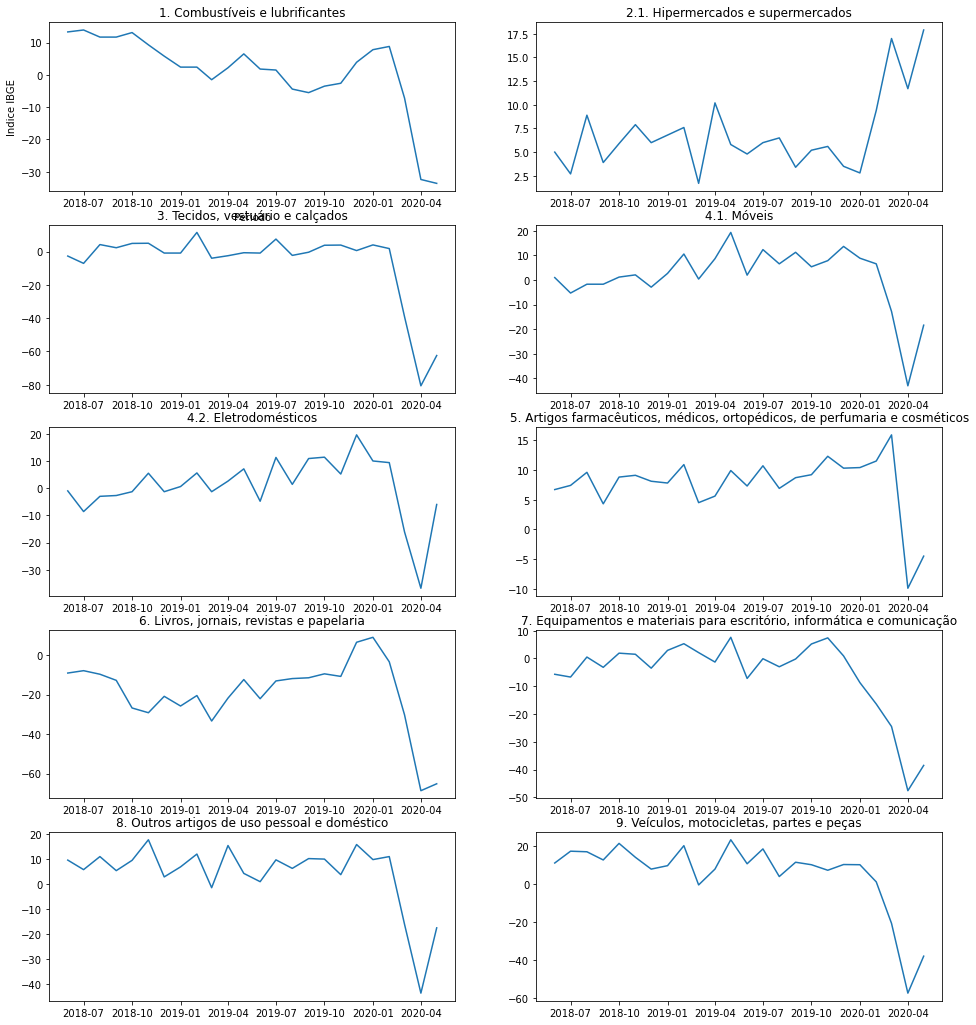

In [342]:
# importando o matplotlib
import matplotlib.pyplot as plt

# Incluindo o periodo de acordo com as datas dos arquivos
periodo = ['06/2018', '07/2018', '08/2018', '09/2018', '10/2018', '11/2018', '12/2018','01/2019', '02/2019', '03/2019','04/2019', '05/2019', '06/2019', '07/2019', '08/2019', '09/2019', '10/2019', '11/2019', '12/2019', '01/2020', '02/2020', '03/2020','04/2020', '05/2020']
dataset['periodo'] = periodo

# ajustando o dataset para criar uma coluna do tipo "data" 
dataset['periodo'] = pd.to_datetime(dataset['periodo'])

plt.figure(figsize=(16, 18))

plt.subplot(5, 2, 1)
plt.plot(dataset['periodo'], dataset['1. Combustíveis e lubrificantes'])
plt.title('1. Combustíveis e lubrificantes')
plt.xlabel('Periodo')
plt.ylabel('Indice IBGE')

plt.subplot(5, 2, 2)
plt.plot(dataset['periodo'], dataset['2.1. Hipermercados e supermercados'])
plt.title('2.1. Hipermercados e supermercados')

plt.subplot(5, 2, 3)
plt.plot(dataset['periodo'], dataset['3. Tecidos, vestuário e calçados'])
plt.title('3. Tecidos, vestuário e calçados')

plt.subplot(5, 2, 4)
plt.plot(dataset['periodo'], dataset['4.1. Móveis'])
plt.title('4.1. Móveis')

plt.subplot(5, 2, 5)
plt.plot(dataset['periodo'], dataset['4.2. Eletrodomésticos'])
plt.title('4.2. Eletrodomésticos')

plt.subplot(5, 2, 6)
plt.plot(dataset['periodo'], dataset['5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos'])
plt.title('5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos')

plt.subplot(5, 2, 7)
plt.plot(dataset['periodo'], dataset['6. Livros, jornais, revistas e papelaria'])
plt.title('6. Livros, jornais, revistas e papelaria')

plt.subplot(5, 2, 8)
plt.plot(dataset['periodo'], dataset['7. Equipamentos e materiais para escritório, informática e comunicação'])
plt.title('7. Equipamentos e materiais para escritório, informática e comunicação')

plt.subplot(5, 2, 9)
plt.plot(dataset['periodo'], dataset['8. Outros artigos de uso pessoal e doméstico'])
plt.title('8. Outros artigos de uso pessoal e doméstico')
 
plt.subplot(5, 2, 10)
plt.plot(dataset['periodo'], dataset['9. Veículos, motocicletas, partes e peças'])
plt.title('9. Veículos, motocicletas, partes e peças')

plt.show()

### Analisando as correlações

In [344]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

0,1. Combustíveis e lubrificantes,"2. Hipermercados, supermercados, produtos alimentícios bebidas e fumo",2.1. Hipermercados e supermercados,"3. Tecidos, vestuário e calçados",4. Móveis e eletrodomésticos,4.1. Móveis,4.2. Eletrodomésticos,"5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos","6. Livros, jornais, revistas e papelaria","7. Equipamentos e materiais para escritório, informática e comunicação",8. Outros artigos de uso pessoal e doméstico,"9. Veículos, motocicletas, partes e peças"
0,,,,,,,,,,,,
1. Combustíveis e lubrificantes,1.000000,-0.579618,-0.606261,0.846161,0.546432,0.631521,0.483765,0.670417,0.762970,0.723975,0.795117,0.875377
"2. Hipermercados, supermercados, produtos alimentícios bebidas e fumo",-0.579618,1.000000,0.998024,-0.662128,-0.475688,-0.514347,-0.444986,-0.227536,-0.610530,-0.658198,-0.515223,-0.646334
2.1. Hipermercados e supermercados,-0.606261,0.998024,1.000000,-0.691941,-0.508149,-0.547159,-0.475967,-0.270674,-0.642027,-0.681967,-0.545962,-0.673371
"3. Tecidos, vestuário e calçados",0.846161,-0.662128,-0.691941,1.000000,0.829036,0.878162,0.778391,0.735217,0.807293,0.925205,0.930737,0.956822
4. Móveis e eletrodomésticos,0.546432,-0.475688,-0.508149,0.829036,1.000000,0.958247,0.991217,0.672594,0.767125,0.775776,0.878098,0.773915
4.1. Móveis,0.631521,-0.514347,-0.547159,0.878162,0.958247,1.000000,0.913036,0.731892,0.784940,0.852369,0.875400,0.855617
4.2. Eletrodomésticos,0.483765,-0.444986,-0.475967,0.778391,0.991217,0.913036,1.000000,0.620467,0.732034,0.721815,0.852232,0.712962
"5. Artigos farmacêuticos, médicos, ortopédicos, de perfumaria e cosméticos",0.670417,-0.227536,-0.270674,0.735217,0.672594,0.731892,0.620467,1.000000,0.747948,0.664936,0.679403,0.706842
"6. Livros, jornais, revistas e papelaria",0.762970,-0.610530,-0.642027,0.807293,0.767125,0.784940,0.732034,0.747948,1.000000,0.674488,0.782763,0.770803


### Comparando setores com correlações acima de 0.9

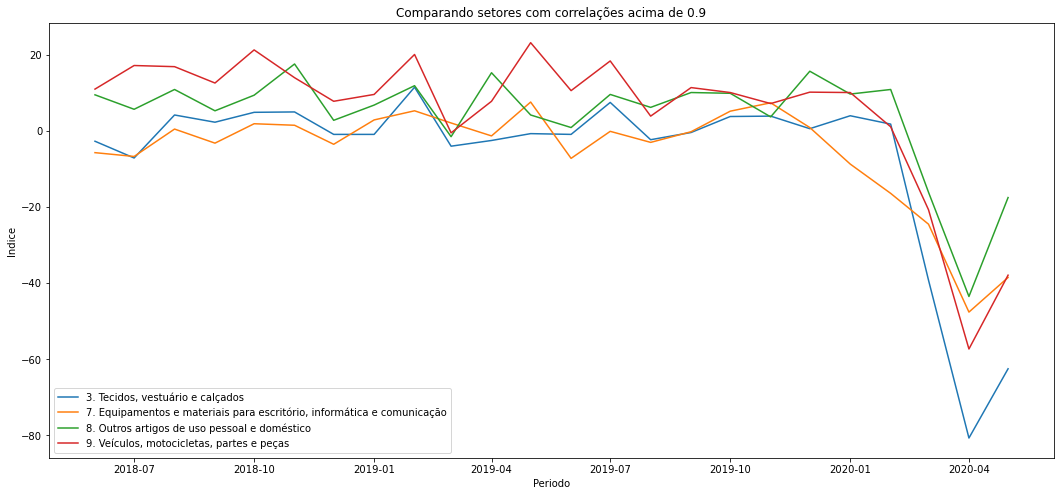

In [353]:
setor3, = plt.plot(dataset['periodo'], dataset['3. Tecidos, vestuário e calçados'])
setor7, = plt.plot(dataset['periodo'], dataset['7. Equipamentos e materiais para escritório, informática e comunicação'])
setor8, =  plt.plot(dataset['periodo'], dataset['8. Outros artigos de uso pessoal e doméstico'])
setor9, = plt.plot(dataset['periodo'], dataset['9. Veículos, motocicletas, partes e peças'])
plt.xlabel('Periodo')
plt.ylabel('Indice')
plt.title('Comparando setores com correlações acima de 0.9')

plt.legend([setor3, setor7, setor8, setor9], ['3. Tecidos, vestuário e calçados','7. Equipamentos e materiais para escritório, informática e comunicação','8. Outros artigos de uso pessoal e doméstico','9. Veículos, motocicletas, partes e peças'])

plt.show()

Pela análise do grafico, verifica-se que a maior queda no indice de consumo foi do setor de Tecidos, vestuários e calçados.

### Exportando os dados para visualização e análise no Tableau

In [127]:
dataset.to_csv("pmc.csv", sep=";", index=False)